# Tasks

#### 3: Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.

- In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
- Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

#### 4: Create a line chart of your data.

#### 5: Decompose the data’s components.

- Analyze the results from the plot in a markdown cell.

#### 6: Conduct a Dickey-Fuller test to check for stationarity.

- Interpret the results in a markdown cell and reference your null hypothesis.

#### 7: If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

#### 8: If your data still isn’t stationary, perform another round of differencing and repeat step 6.

#### 9: Check your data’s autocorrelations.

# Importing Libraries

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# Importing Data

In [25]:
path = r'C:\Users\maxca\Part 6 Gun Violence'

In [26]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_gunviolence_cleand_2.csv'))

In [27]:
df.shape

(236210, 16)

In [28]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,year,state_year,lawtotal,Total population
0,0,95289,2014-01-01,Michigan,Muskegon,0,0,Shots Fired - No Injuries,43.2301,NaN,-86.2514,1.372442,2014-01-01,Michigan2014,20,9747730
1,1,92607,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.4142,NaN,-82.9582,1.372442,2014-01-01,Michigan2014,20,9747730
2,2,92602,2014-01-01,Michigan,Detroit,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",42.3484,NaN,-83.0597,1.372442,2014-01-01,Michigan2014,20,9747730
3,3,92620,2014-01-01,Michigan,Detroit,0,2,Shot - Wounded/Injured||Brandishing/flourishin...,42.3756,NaN,-83.0643,1.372442,2014-01-01,Michigan2014,20,9747730
4,4,92612,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.3727,NaN,-83.1921,1.372442,2014-01-01,Michigan2014,20,9747730


In [29]:
df = df.drop(columns =['Unnamed: 0', 'city_or_county', 'location_description', 'incident_characteristics', 'latitude', 'longitude', 'year'])

In [30]:
df.head()

,incident_id,date,state,n_killed,n_injured,n_guns_involved,state_year,lawtotal,Total population
0,95289,2014-01-01,Michigan,0,0,1.372442,Michigan2014,20,9747730
1,92607,2014-01-01,Michigan,0,1,1.372442,Michigan2014,20,9747730
2,92602,2014-01-01,Michigan,2,2,1.372442,Michigan2014,20,9747730
3,92620,2014-01-01,Michigan,0,2,1.372442,Michigan2014,20,9747730
4,92612,2014-01-01,Michigan,0,1,1.372442,Michigan2014,20,9747730


#### 3: Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.

- In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
- Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.


#### We're generating a subset for the date and the incident_id (in our case counts) to look at the date when incidents are more often

In [31]:
df_sub = df.groupby('date').size().reset_index(name='incident_count')

In [32]:
df_sub.head()

,date,incident_count
0,2014-01-01,208
1,2014-01-02,116
2,2014-01-03,120
3,2014-01-04,139
4,2014-01-05,130


In [ ]:
df_sub.head()

In [38]:
df_sub['date'] = pd.to_datetime(df_sub['date'])

# Set 'date' as the index
df_sub.set_index('date', inplace=True)

In [39]:
monthly_counts = df_sub.resample('M').sum()

In [40]:
monthly_counts.head()

,incident_count
date,
2014-01-31,4289
2014-02-28,2995
2014-03-31,3639
2014-04-30,3842
2014-05-31,4262


#### 4: Create a line chart of your data.

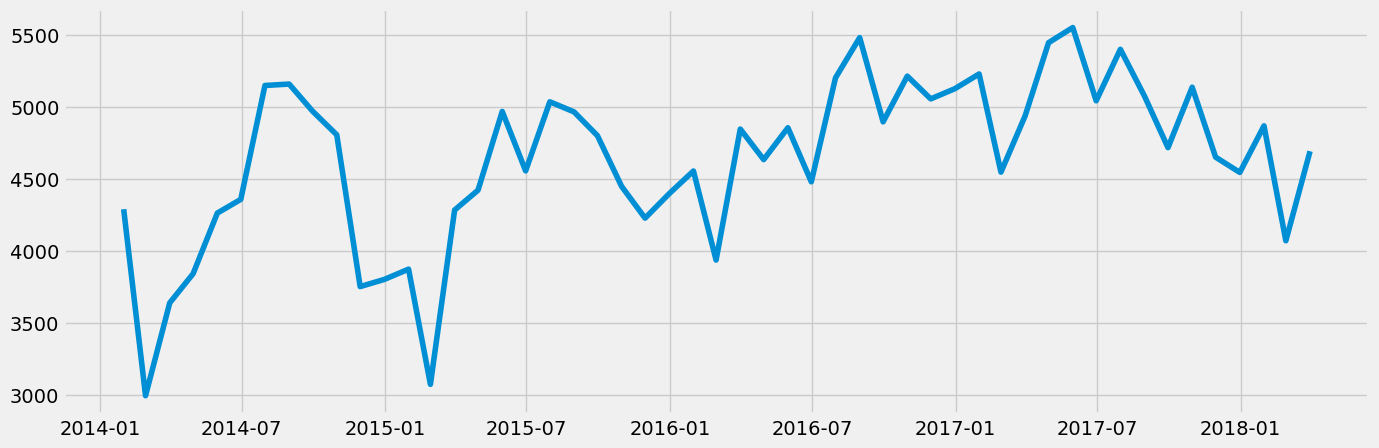

In [41]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(monthly_counts)

#### 5: Decompose the data’s components.

- Analyze the results from the plot in a markdown cell.


In [42]:
decomposition = sm.tsa.seasonal_decompose(monthly_counts, model='additive')

In [43]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

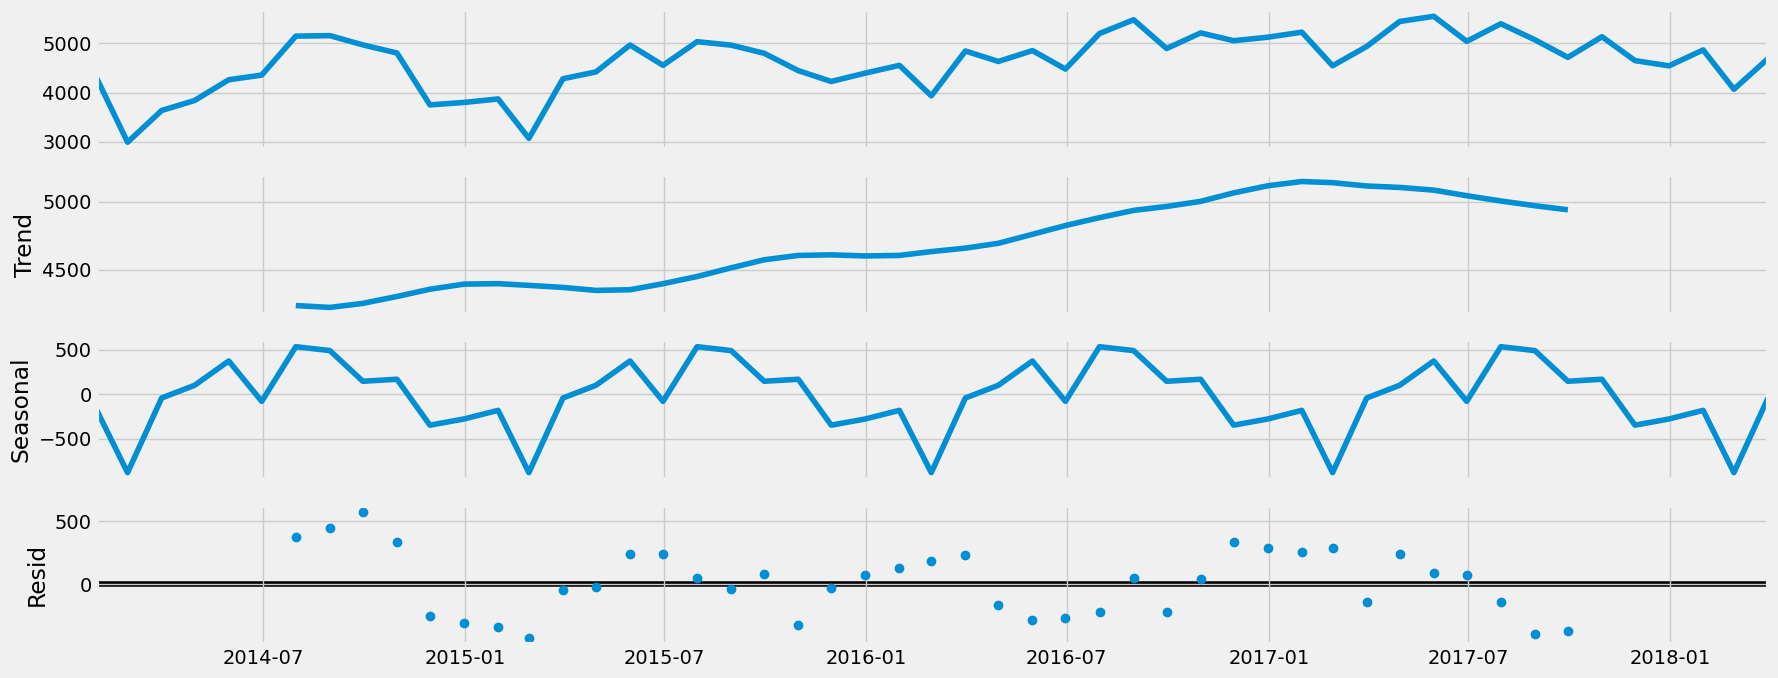

In [44]:
# Plot the separate components

decomposition.plot()
plt.show()

#### We seem to have an upwards trend with seasonality. Additionally our data doesn't seem to be stationary.

#### 6: Conduct a Dickey-Fuller test to check for stationarity.¶

- Interpret the results in a markdown cell and reference your null hypothesis.


In [46]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(monthly_counts['incident_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.324289
p-value                         0.617988
Number of Lags Used            11.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


#### Our Test Statistic is greater than our critical value (by far) which indicates non-stationary data, which means we can't reject our null hypothesis.

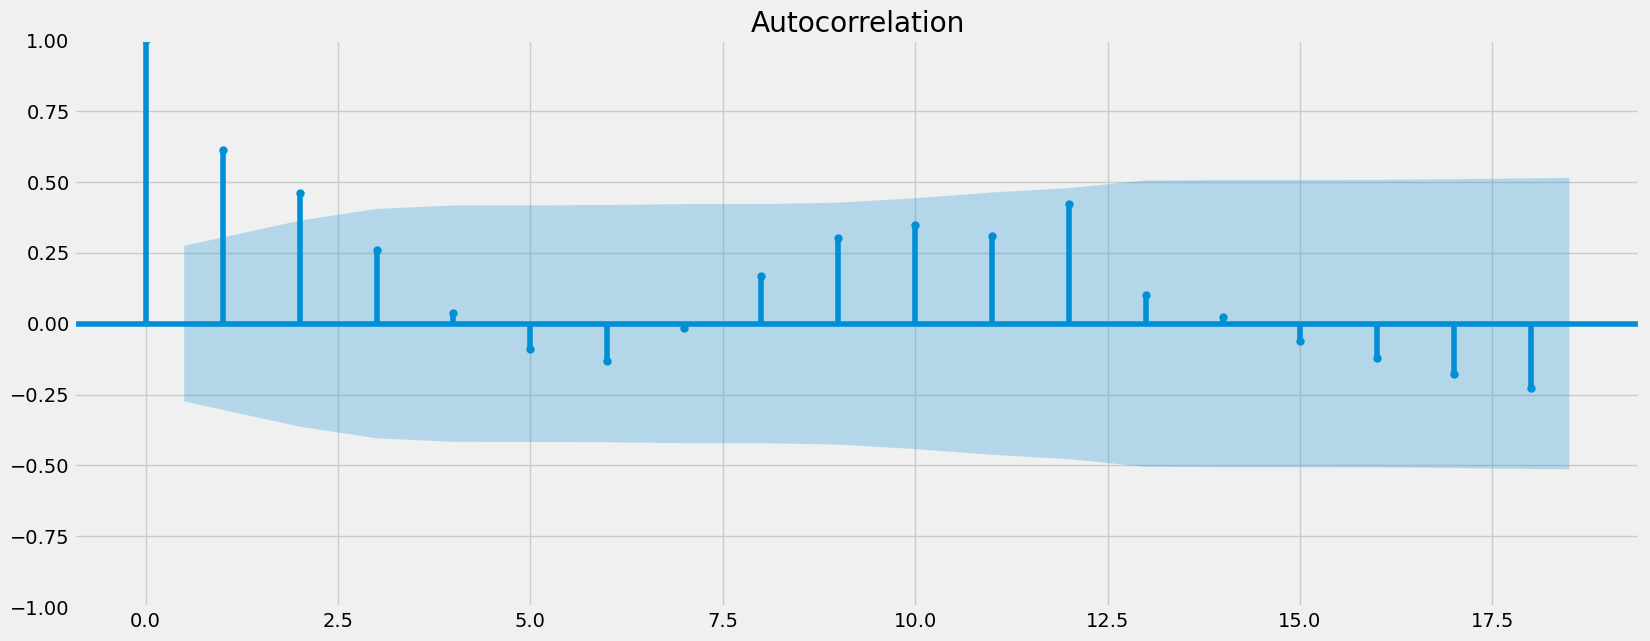

In [47]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(monthly_counts)
plt.show()

#### 7: If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [48]:
monthly_counts_diff = monthly_counts - monthly_counts.shift(1)

In [50]:
monthly_counts_diff.dropna(inplace = True)

In [51]:
monthly_counts_diff.head()

,incident_count
date,
2014-02-28,-1294.0
2014-03-31,644.0
2014-04-30,203.0
2014-05-31,420.0
2014-06-30,95.0


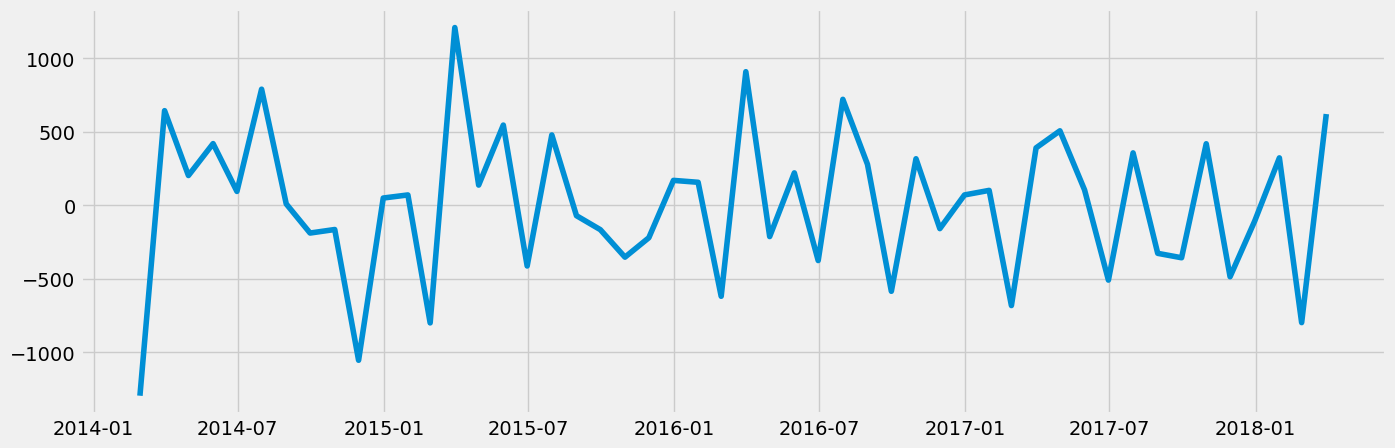

In [53]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(monthly_counts_diff)

In [54]:
dickey_fuller(monthly_counts_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.413528
p-value                         0.575774
Number of Lags Used            11.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


#### Data still not stationary.

#### 8: If your data still isn’t stationary, perform another round of differencing and repeat step 6.

In [60]:
monthly_counts_diff_2 = monthly_counts_diff - monthly_counts_diff.shift(1)

In [62]:
monthly_counts_diff_2.dropna(inplace = True)

In [63]:
dickey_fuller(monthly_counts_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -6.058125e+00
p-value                        1.231034e-07
Number of Lags Used            1.000000e+01
Number of Observations Used    3.800000e+01
Critical Value (1%)           -3.615509e+00
Critical Value (5%)           -2.941262e+00
Critical Value (10%)          -2.609200e+00
dtype: float64


#### Now it is stationary.

#### 9: Check your data’s autocorrelations.

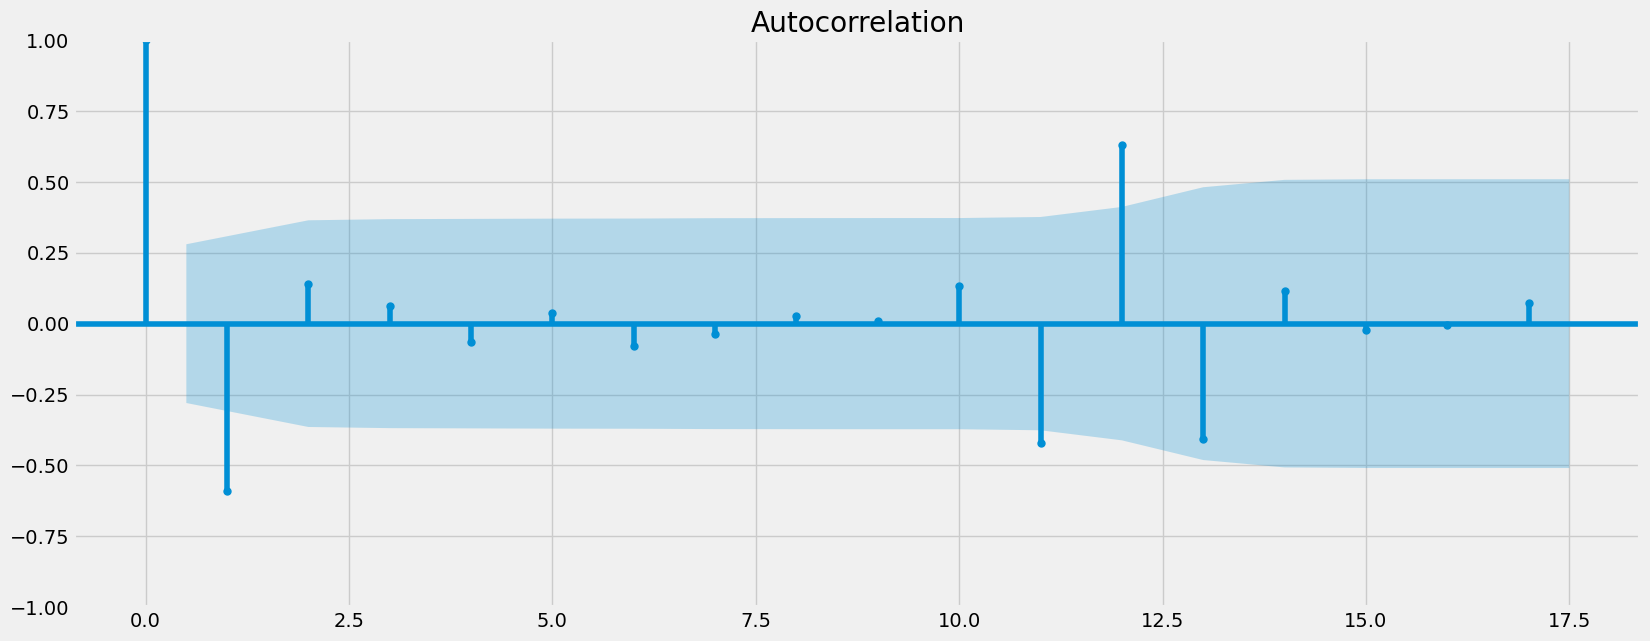

In [64]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(monthly_counts_diff_2)
plt.show()